<a href="https://colab.research.google.com/github/Madhav2204/LGMVIP-DataScience/blob/main/Task_5_Exploratory_Data_Analysis_on_Dataset_Terrorism_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author : Madhav Shrivastava

### TASK 5:Exploratory Data Analysis on Dataset - Terrorism 

Dataset links -https://drive.google.com/file/d/1luTU7xBvI7QAGPbQMxEHcgKUi9d6UeP_/view

In [ ]:
import pandas as pd
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv('globalterrorismdb_0718dist.csv',low_memory=False)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'CountryName',
                   'provstate':'State', 'country':'CountryCode','region':'RegionCode','city':'City','latitude':'Latitude',
                   'longitude':'Longitude','region_txt':'RegionName','attacktype1_txt':'AttackType','target1':'Specific_Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1':'TargetCode',
                   'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','weaptype1':'WeaponCode','motive':'Motive'},
                    inplace=True)

df=df[['Year','Month','Day','Extended','CountryCode','CountryName','State','RegionCode','RegionName','City','Latitude',
       'Longitude','AttackType','Killed','Wounded','Specific_Target','TargetCode','Target_type','Summary','Group',
       'WeaponCode','Weapon_type','Motive']]

In [ ]:
df.sample(3)

,Year,Month,Day,Extended,CountryCode,CountryName,State,RegionCode,RegionName,City,...,Killed,Wounded,Specific_Target,TargetCode,Target_type,Summary,Group,WeaponCode,Weapon_type,Motive
78913,2005,9,5,0,95,Iraq,Baghdad,10,Middle East & North Africa,Baghdad,...,2.0,5.0,Iraqi policemen at a checkpoint for the Inter...,3,Police,09/05/2005: Unidentified perpetrators using ro...,Unknown,5,Firearms,Unknown
88391,2008,8,11,0,160,Philippines,North Cotabato,5,Southeast Asia,Pikit,...,1.0,1.0,A passenger bus,19,Transportation,"08/11/2008: On Monday, in Pikit, Cotabato, Phi...",Moro Islamic Liberation Front (MILF),5,Firearms,The specific motive for the attack was to prev...
158482,2016,2,3,0,153,Pakistan,Khyber Pakhtunkhwa,6,South Asia,Bannu,...,0.0,0.0,Unknown,20,Unknown,02/03/2016: Security officials identified and ...,Unknown,6,Explosives,NaN


In [ ]:
df['RegionName'].value_counts() 

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: RegionName, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Middle East & North Africa'),
  Text(1, 0, 'South Asia'),
  Text(2, 0, 'South America'),
  Text(3, 0, 'Sub-Saharan Africa'),
  Text(4, 0, 'Western Europe'),
  Text(5, 0, 'Southeast Asia'),
  Text(6, 0, 'Central America & Caribbean'),
  Text(7, 0, 'Eastern Europe'),
  Text(8, 0, 'North America'),
  Text(9, 0, 'East Asia'),
  Text(10, 0, 'Central Asia'),
  Text(11, 0, 'Australasia & Oceania')])

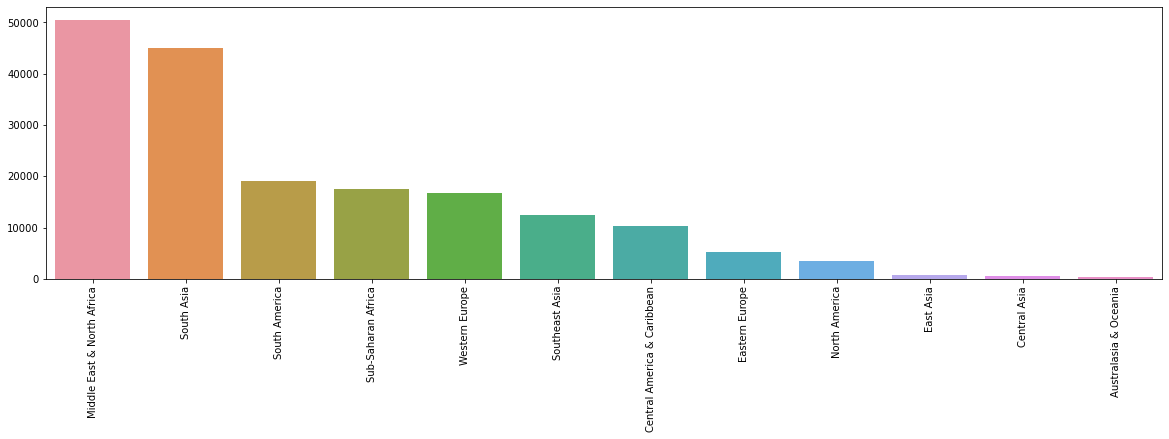

In [ ]:
plt.figure(figsize = (20,5))
sns.barplot(df['RegionName'].value_counts()[:12].index,df['RegionName'].value_counts()[:12].values)
plt.xticks(rotation = 90)

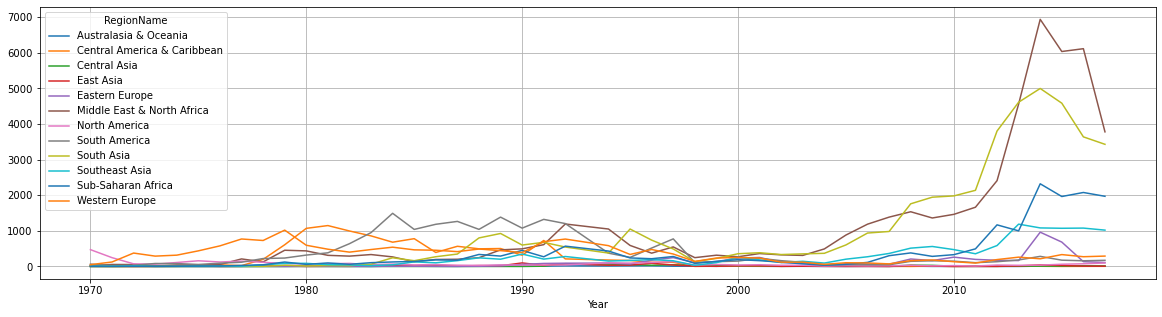

In [ ]:
pd.crosstab(df.Year, df.RegionName).plot(kind='line',figsize=(20,5))
plt.grid()

In [ ]:
df['CountryName'].value_counts() 

Iraq             24636
Pakistan         14368
Afghanistan      12731
India            11960
Colombia          8306
                 ...  
Andorra              1
Vatican City         1
St. Lucia            1
South Vietnam        1
International        1
Name: CountryName, Length: 205, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Iraq'),
  Text(1, 0, 'Pakistan'),
  Text(2, 0, 'Afghanistan'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Colombia'),
  Text(5, 0, 'Philippines'),
  Text(6, 0, 'Peru'),
  Text(7, 0, 'El Salvador'),
  Text(8, 0, 'United Kingdom'),
  Text(9, 0, 'Turkey'),
  Text(10, 0, 'Somalia'),
  Text(11, 0, 'Nigeria'),
  Text(12, 0, 'Thailand'),
  Text(13, 0, 'Yemen'),
  Text(14, 0, 'Spain'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'United States'),
  Text(17, 0, 'Algeria'),
  Text(18, 0, 'France'),
  Text(19, 0, 'Egypt')])

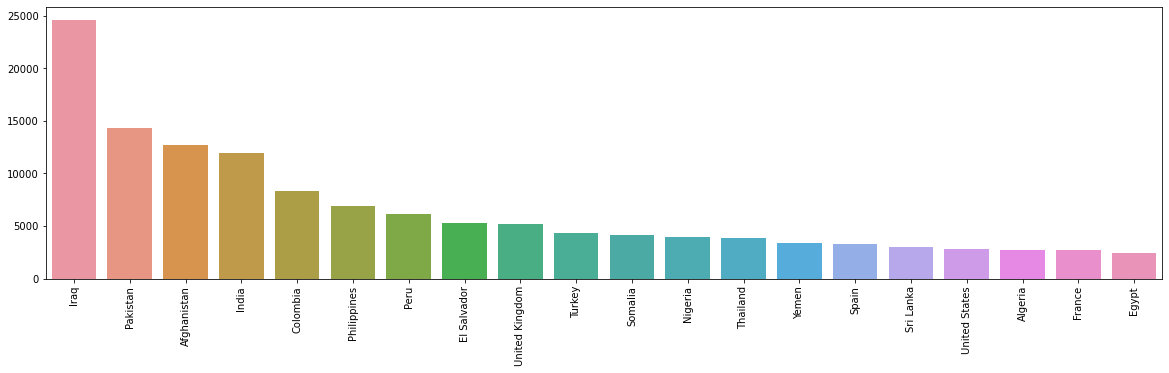

In [ ]:
plt.figure(figsize = (20,5))
sns.barplot(df['CountryName'].value_counts()[:20].index,df['CountryName'].value_counts()[:20].values)
plt.xticks(rotation = 90)

In [ ]:
df['State'].value_counts() 

Baghdad             7645
Northern Ireland    4498
Unknown             4290
Balochistan         3710
Saladin             3411
                    ... 
North SInai            1
Elbrussky              1
Chumphon               1
Amur                   1
Baoruco                1
Name: State, Length: 2854, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Baghdad'),
  Text(1, 0, 'Northern Ireland'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Balochistan'),
  Text(4, 0, 'Saladin'),
  Text(5, 0, 'Al Anbar'),
  Text(6, 0, 'Nineveh'),
  Text(7, 0, 'Sindh'),
  Text(8, 0, 'Khyber Pakhtunkhwa'),
  Text(9, 0, 'Diyala'),
  Text(10, 0, 'Lima'),
  Text(11, 0, 'Jammu and Kashmir'),
  Text(12, 0, 'Federally Administered Tribal Areas'),
  Text(13, 0, 'San Salvador'),
  Text(14, 0, 'Antioquia'),
  Text(15, 0, 'Punjab'),
  Text(16, 0, 'Kirkuk'),
  Text(17, 0, 'Santiago Metropolitan'),
  Text(18, 0, 'Banaadir'),
  Text(19, 0, 'West Bank')])

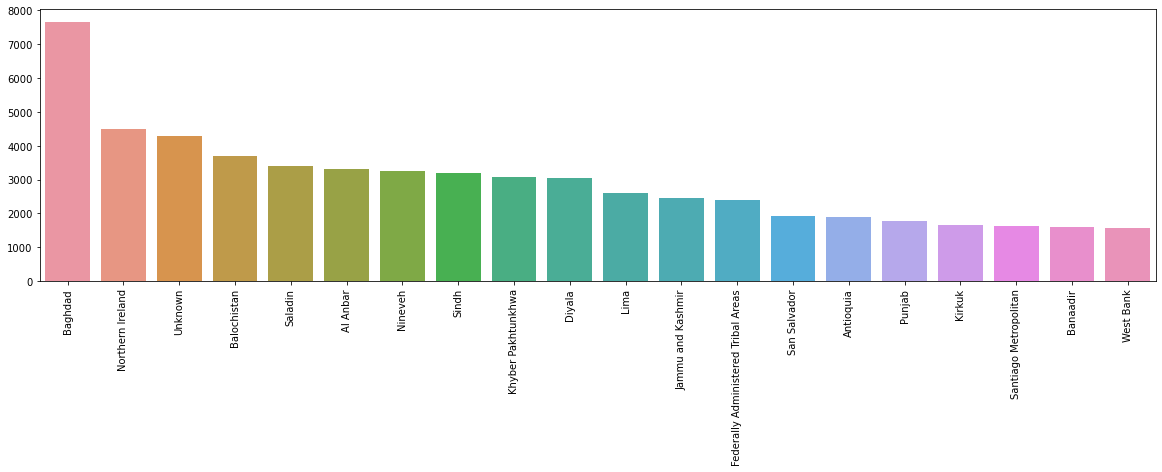

In [ ]:
plt.figure(figsize = (20,5))
sns.barplot(df['State'].value_counts()[:20].index,df['State'].value_counts()[:20].values)
plt.xticks(rotation = 90)

In [ ]:
df['City'].value_counts() 

Unknown                 9775
Baghdad                 7589
Karachi                 2652
Lima                    2359
Mosul                   2265
                        ... 
Plasencia                  1
Afom                       1
Onitcha                    1
Krong Penang distrct       1
Kalukgolla                 1
Name: City, Length: 36674, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'Baghdad'),
  Text(2, 0, 'Karachi'),
  Text(3, 0, 'Lima'),
  Text(4, 0, 'Mosul'),
  Text(5, 0, 'Belfast'),
  Text(6, 0, 'Santiago'),
  Text(7, 0, 'Mogadishu'),
  Text(8, 0, 'San Salvador'),
  Text(9, 0, 'Istanbul'),
  Text(10, 0, 'Athens'),
  Text(11, 0, 'Bogota'),
  Text(12, 0, 'Kirkuk'),
  Text(13, 0, 'Beirut'),
  Text(14, 0, 'Medellin'),
  Text(15, 0, 'Benghazi'),
  Text(16, 0, 'Peshawar'),
  Text(17, 0, 'Quetta'),
  Text(18, 0, 'Guatemala City'),
  Text(19, 0, 'Baqubah')])

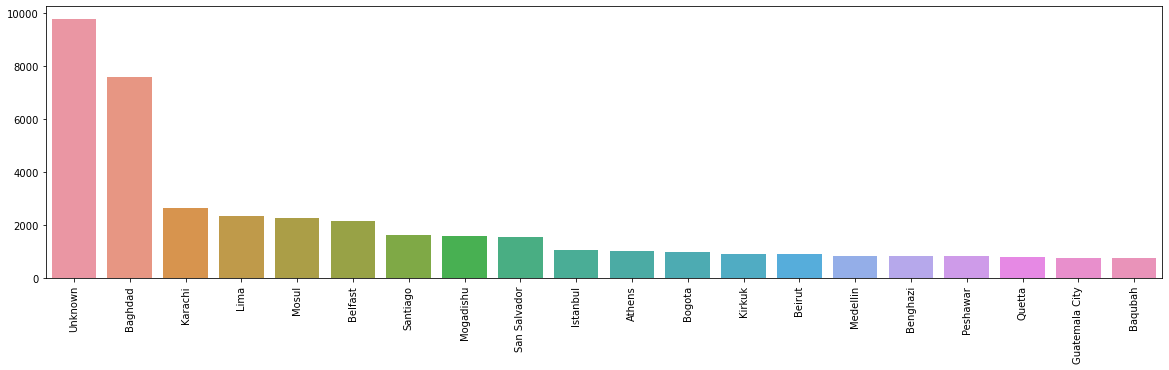

In [ ]:
plt.figure(figsize = (20,5))
sns.barplot(df['City'].value_counts()[:20].index,df['City'].value_counts()[:20].values)
plt.xticks(rotation = 90)

<AxesSubplot:>

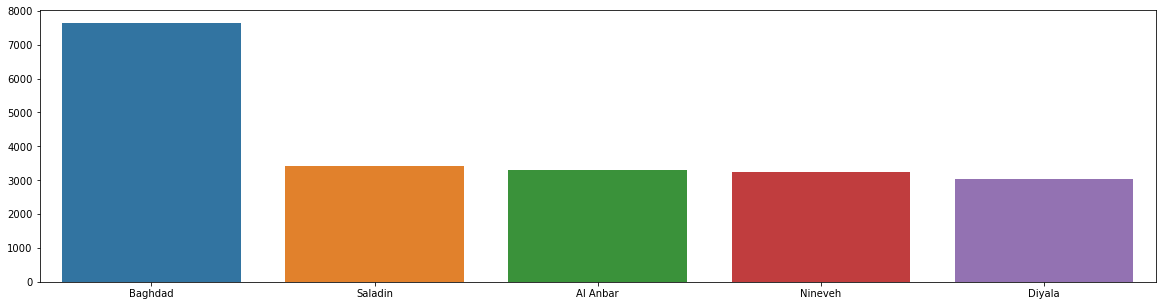

In [ ]:
df_st1=df[df['CountryName']=='Iraq']['State']
plt.figure(figsize = (20,5))
sns.barplot(df_st1.value_counts()[:5].index,df_st1.value_counts()[:5].values)

<AxesSubplot:>

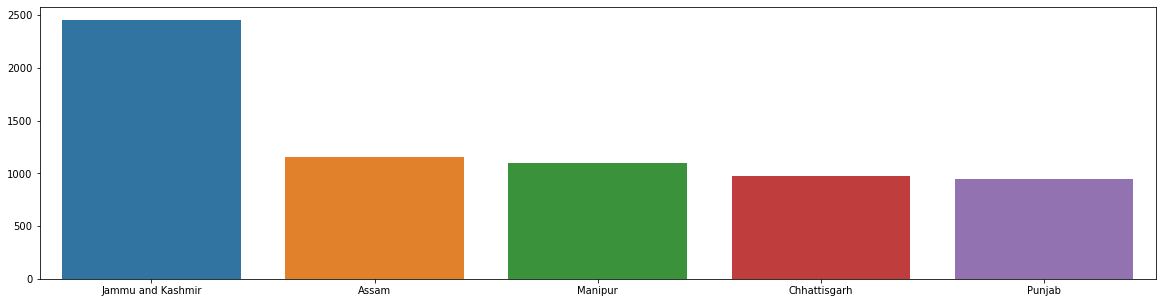

In [ ]:
df_st2=df[df['CountryName']=='India']['State']
plt.figure(figsize = (20,5))
sns.barplot(df_st2.value_counts()[:5].index,df_st2.value_counts()[:5].values)

<AxesSubplot:>

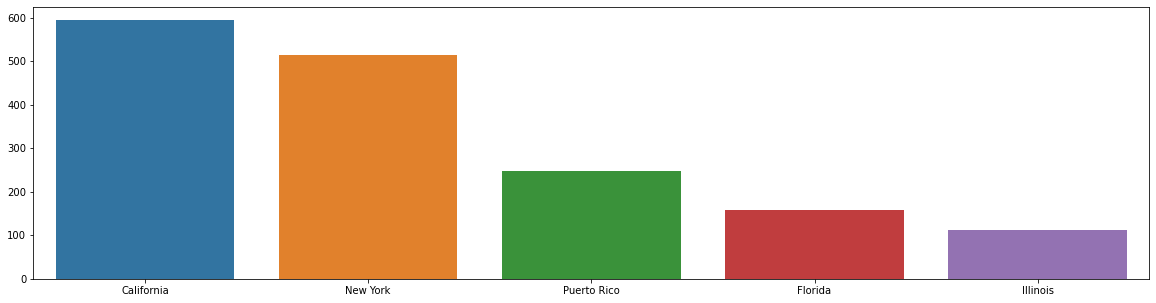

In [ ]:
df_st3=df[df['CountryName']=='United States']['State']
plt.figure(figsize = (20,5))
sns.barplot(df_st3.value_counts()[:5].index,df_st3.value_counts()[:5].values)

<AxesSubplot:>

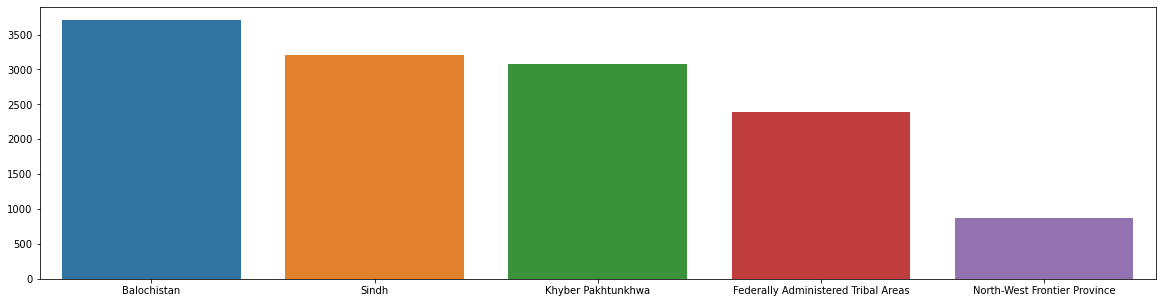

In [ ]:
df_st4=df[df['CountryName']=='Pakistan']['State']
plt.figure(figsize = (20,5))
sns.barplot(df_st4.value_counts()[:5].index,df_st4.value_counts()[:5].values)

<AxesSubplot:>

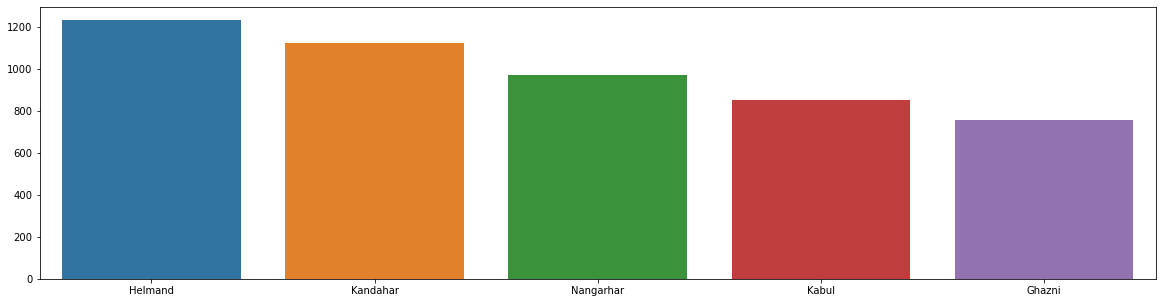

In [ ]:
df_st5=df[df['CountryName']=='Afghanistan']['State']
plt.figure(figsize = (20,5))
sns.barplot(df_st5.value_counts()[:5].index,df_st5.value_counts()[:5].values)

<AxesSubplot:>

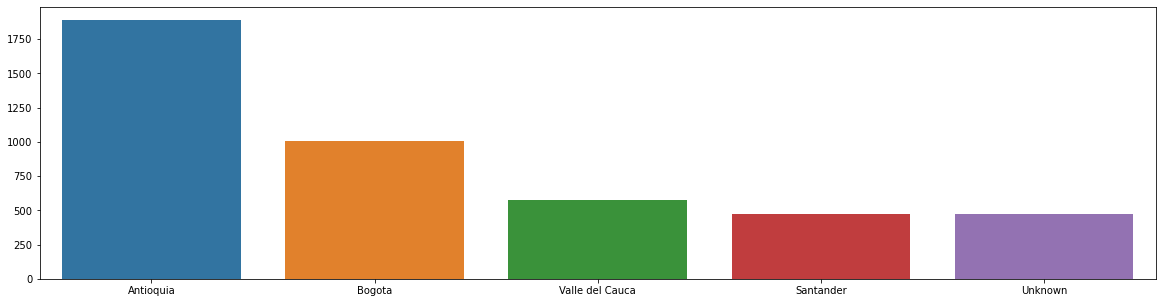

In [ ]:
df_st6=df[df['CountryName']=='Colombia']['State']
plt.figure(figsize = (20,5))
sns.barplot(df_st6.value_counts()[:5].index,df_st6.value_counts()[:5].values)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, '1970'),
  Text(1, 0, '1971'),
  Text(2, 0, '1972'),
  Text(3, 0, '1973'),
  Text(4, 0, '1974'),
  Text(5, 0, '1975'),
  Text(6, 0, '1976'),
  Text(7, 0, '1977'),
  Text(8, 0, '1978'),
  Text(9, 0, '1979'),
  Text(10, 0, '1980'),
  Text(11, 0, '1981'),
  Text(12, 0, '1982'),
  Text(13, 0, '1983'),
  Text(14, 0, '1984'),
  Text(15, 0, '1985'),
  Text(16, 0, '1986'),
  Text(17, 0, '1987'),
  Text(18, 0, '1988'),
  Text(19, 0, '1989'),
  Text(20, 0, '1990'),
  Text(21, 0, '1991'),
  Text(22, 0, '1992'),
  Text(23, 0, '1994'),
  Text(24, 0, '1995'),
  Text(25, 0, '1996'),
  Text(26, 0, '1997'),
  Text(27, 0, '1998'),
  Text(28, 0, '1999'),
  Text(29, 0, '2000'),
  Text(30, 0, '2001'),
  Text(31, 0, '2002'),
  Text(32, 0, '2003'),
  Text(33, 0, '2004'),
  Text(34, 0, 

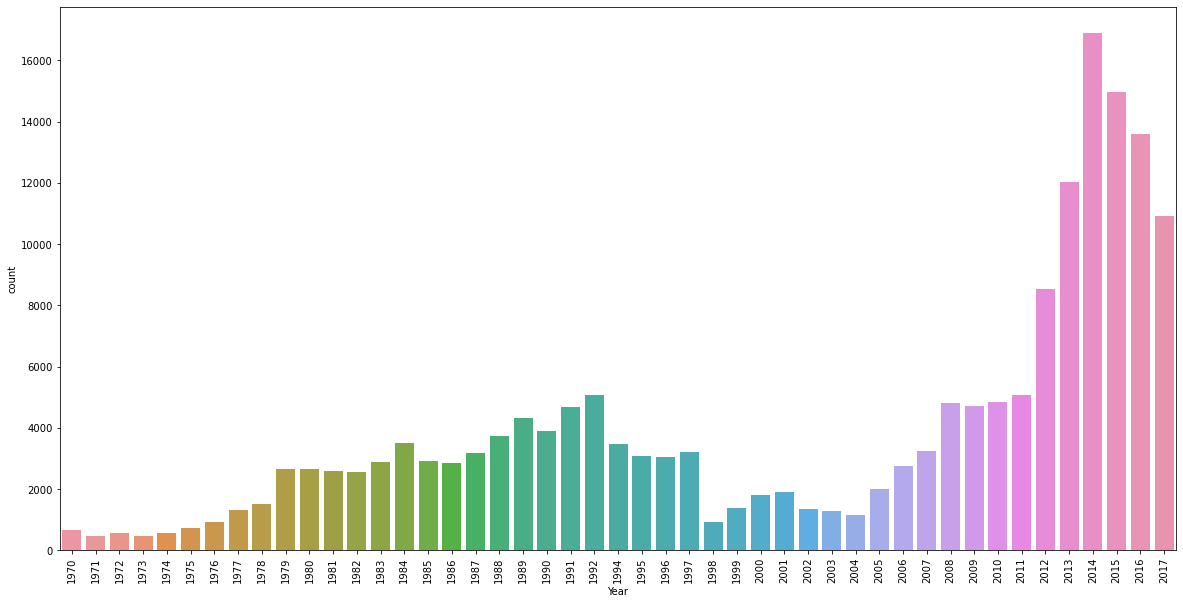

In [ ]:
plt.figure(figsize = (20,10))
sns.countplot('Year',data=df)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Bombing/Explosion'),
  Text(1, 0, 'Armed Assault'),
  Text(2, 0, 'Assassination'),
  Text(3, 0, 'Hostage Taking (Kidnapping)'),
  Text(4, 0, 'Facility/Infrastructure Attack'),
  Text(5, 0, 'Unknown'),
  Text(6, 0, 'Unarmed Assault'),
  Text(7, 0, 'Hostage Taking (Barricade Incident)'),
  Text(8, 0, 'Hijacking')])

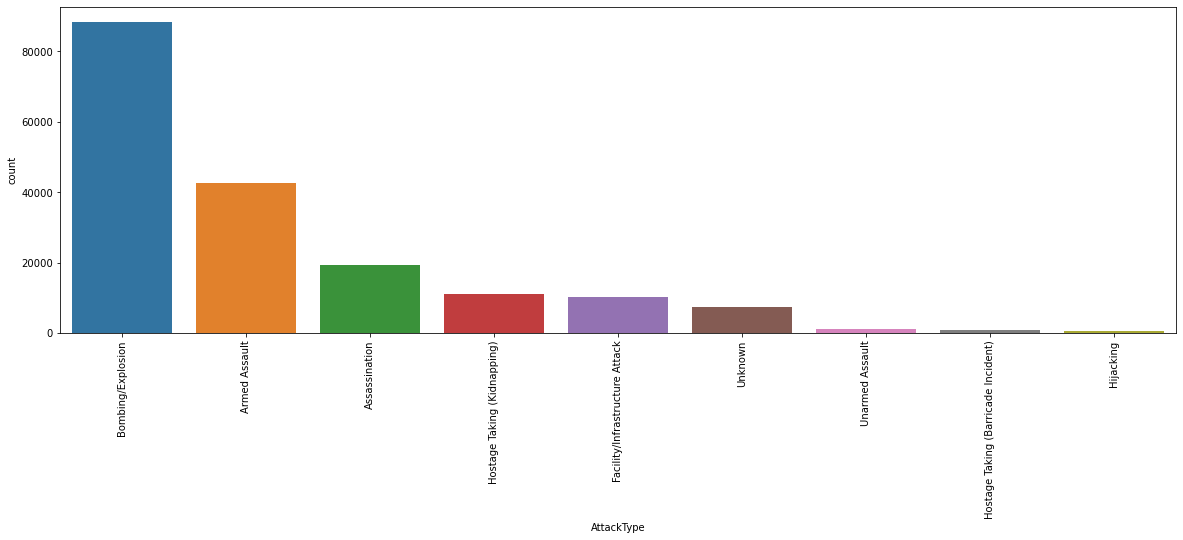

In [ ]:
plt.figure(figsize = (20,6))
sns.countplot(df['AttackType'],order = df['AttackType'].value_counts().index)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Private Citizens & Property'),
  Text(1, 0, 'Military'),
  Text(2, 0, 'Police'),
  Text(3, 0, 'Government (General)'),
  Text(4, 0, 'Business'),
  Text(5, 0, 'Transportation'),
  Text(6, 0, 'Utilities'),
  Text(7, 0, 'Unknown'),
  Text(8, 0, 'Religious Figures/Institutions'),
  Text(9, 0, 'Educational Institution'),
  Text(10, 0, 'Government (Diplomatic)'),
  Text(11, 0, 'Terrorists/Non-State Militia'),
  Text(12, 0, 'Journalists & Media'),
  Text(13, 0, 'Violent Political Party'),
  Text(14, 0, 'Airports & Aircraft'),
  Text(15, 0, 'Telecommunication'),
  Text(16, 0, 'NGO'),
  Text(17, 0, 'Tourists'),
  Text(18, 0, 'Maritime'),
  Text(19, 0, 'Food or Water Supply'),
  Text(20, 0, 'Abortion Related'),
  Text(21, 0, 'Other')])

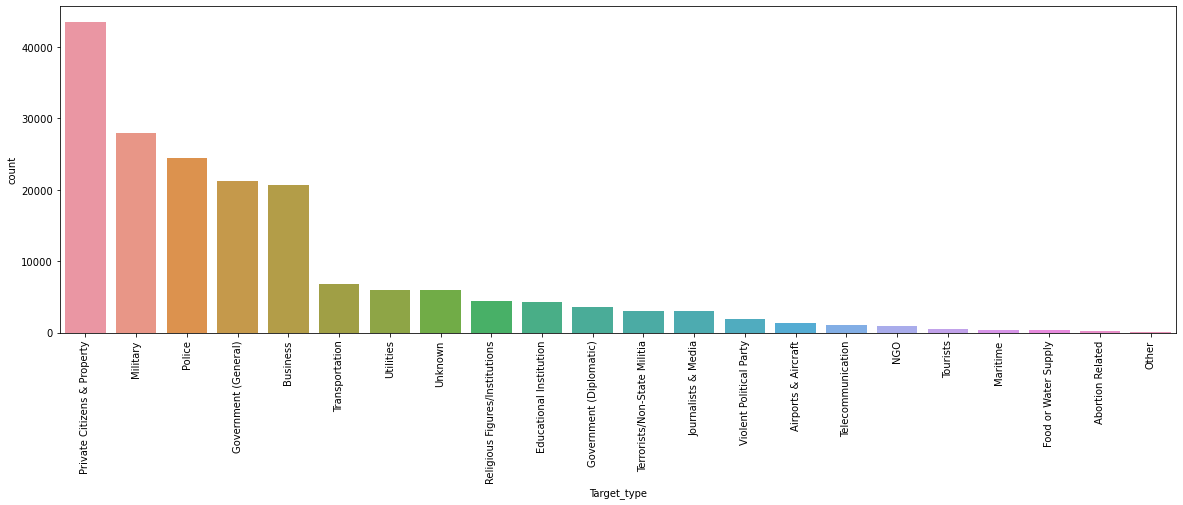

In [ ]:
plt.figure(figsize = (20,6))
sns.countplot(x="Target_type", data=df, order=df["Target_type"].value_counts().index)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'Taliban'),
  Text(2, 0, 'Islamic State of Iraq and the Levant (ISIL)'),
  Text(3, 0, 'Shining Path (SL)'),
  Text(4, 0, 'Farabundo Marti National Liberation Front (FMLN)'),
  Text(5, 0, 'Al-Shabaab'),
  Text(6, 0, "New People's Army (NPA)"),
  Text(7, 0, 'Irish Republican Army (IRA)'),
  Text(8, 0, 'Revolutionary Armed Forces of Colombia (FARC)'),
  Text(9, 0, 'Boko Haram')])

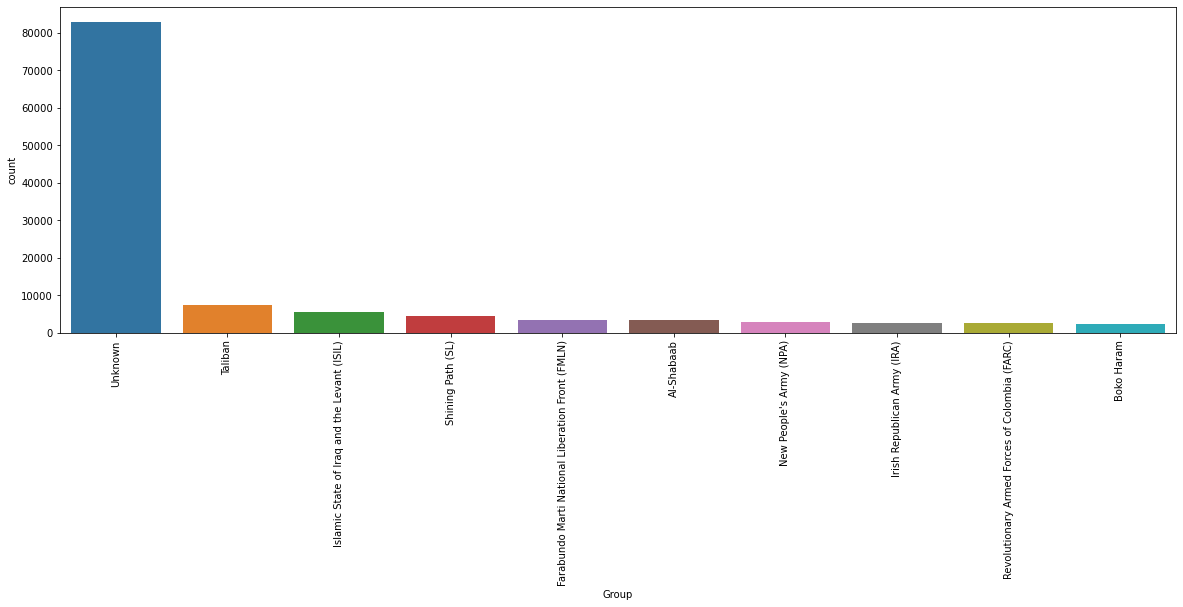

In [ ]:
plt.figure(figsize = (20,6))
sns.countplot(x="Group", data=df, order=df["Group"].value_counts()[:10].index)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Explosives'),
  Text(1, 0, 'Firearms'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Incendiary'),
  Text(4, 0, 'Melee'),
  Text(5, 0, 'Chemical'),
  Text(6, 0, 'Sabotage Equipment'),
  Text(7, 0, 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'),
  Text(8, 0, 'Other'),
  Text(9, 0, 'Biological'),
  Text(10, 0, 'Fake Weapons'),
  Text(11, 0, 'Radiological')])

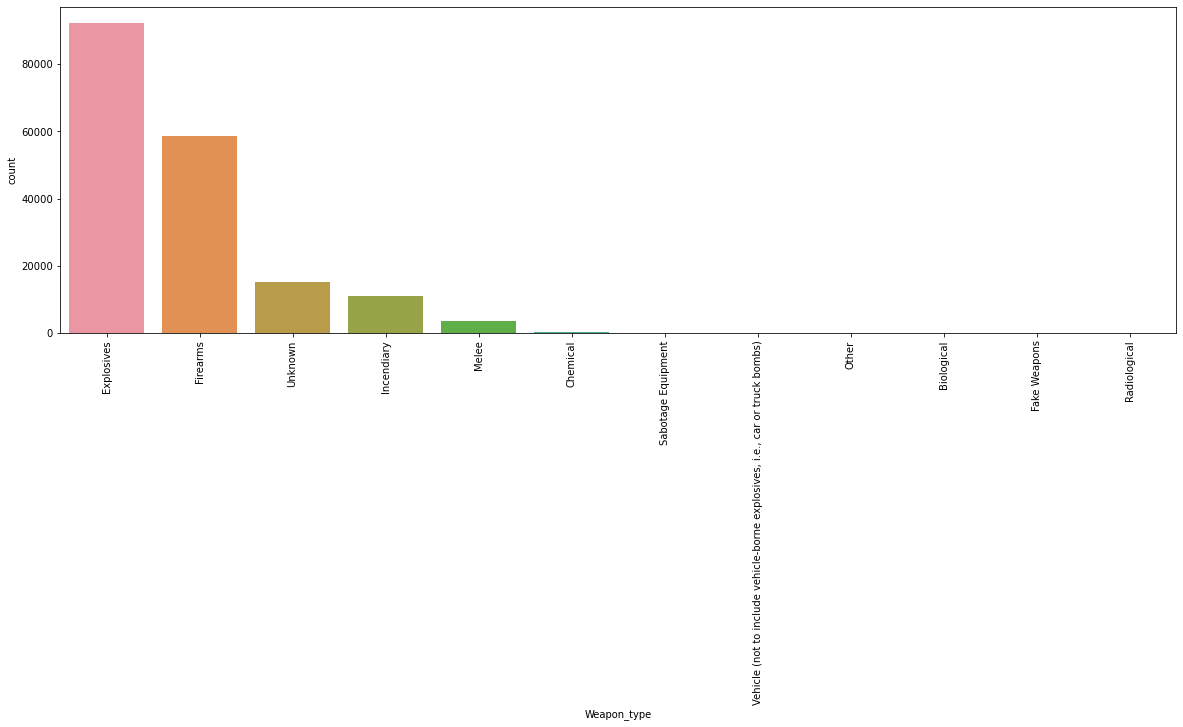

In [ ]:
plt.figure(figsize = (20,6))
sns.countplot(df['Weapon_type'],order = df['Weapon_type'].value_counts()[:15].index)
plt.xticks(rotation = 90)

# Conclusions Drawn from EDA:
1. Most affected region is Middle East & North Africa and least affected region is Australasia & Oceania.
2. Terrorists activities spiked after 2010.
3. Top Most affected countries are - Iraq , Pakistan ,Afghanistan ,India and Colombia.
4. Top 3 most affected states are - Baghdad, Northern Ireland, Balochistan.
5. Baghdad and Karachi are the most affected cities worldwide.
6. Jammu n Kashmir is the most affected state in India and Srinagar the most affected City.
7. Explosives and Firearms are the most used weapons by terrorists group.
8. Private Citizens, Property, Military, Police and the Government are the most targeted victim groups.
9.Terrorists mostly attack by bombing , explosives or by armed assaults and least by Hijacking.
10. Amongst the top 10 affected countries in the world, 5 countries are Asian.
Highest number of attacks happened in 2014 and least happened in 1971.
The most active terrorist group in the world is TALIBAN.